In [5]:
# Copyright (c) Siemens AG, 2022
# SPDX-License-Identifier: GPL-2.0

import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit.test.mock import *
from qiskit.transpiler import CouplingMap
from qiskit.visualization import plot_coupling_map

import csv
import os
import sys
import collections
nb_dir = os.getcwd()
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from src.TopologyFunctions import *
from src.maxcut import *
from src.qaoa import *


### IBM-Q

3 different base topologies: Eagle (Washington), Hummingbird (Brooklyn), Falcon (Montreal).
Load the Hummingbird (65 qubits) and Falcon (28 qubits) topologies from FakeBackends and extend them or create new topology from scratch. <br>

- Extend topologies by using **get_extended_heavy_hex_IBMQ**
- For plotting nice coupling maps using the plot_coupling_map function, we need the qubit coordinates and a version of the coupling map containing every connection only once (i.e., only [0,1] and not [1,0]). This is achieved by the fuinctions **get_qubit_coordinates_heavy_hex** and **get_coupling_map_single_heavy_hex**

In [3]:
#load Hummingbird and Falcon from Fake backends

IBM_Hummingbrid = FakeBrooklyn()
conn_IBM_Hummingbrid = [g.to_dict().get('qubits') for g in IBM_Hummingbrid.properties().gates if len(g.to_dict().get('qubits'))>1]
#print(conn_IBM_Hummingbrid)
cmap_IBM_Hummingbrid = CouplingMap(conn_IBM_Hummingbrid)
#plot_gate_map(IBM_Hummingbrid)

IBM_Falcon = FakeMontreal()
conn_IBM_Falcon = [g.to_dict().get('qubits') for g in IBM_Falcon.properties().gates if len(g.to_dict().get('qubits'))>1]
#print(conn_IBM_Falcon)
cmap_IBM_Falcon = CouplingMap(conn_IBM_Falcon)

Extend Hummingbrid to Washington: Add 2 extra rows and 1 extra column. <br>
If the real Washinton topology is needed, the function remove_conn_IBMQ_Washington removes two connection which are missing in the real device. 

In [4]:
extra_rows=2
extra_columns=1
conn_IBM_Washington, n_qubits_new, n_rows, n_cells_per_row = get_extended_heavy_hex_IBMQ(conn_IBM_Hummingbrid, extra_rows, extra_columns)
conn_IBM_Washington_original = remove_conn_IBMQ_Washington(conn_IBM_Washington)

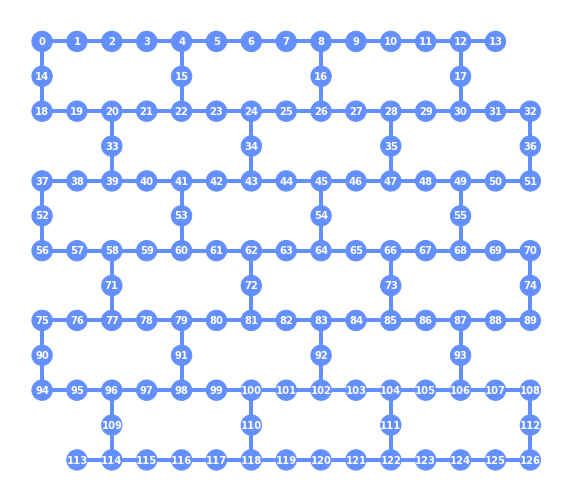

In [6]:
# for plotting: 
cmap_plot=get_coupling_map_single_heavy_hex(conn_IBM_Washington)
qubit_coordinates=get_qubit_coordinates_heavy_hex(6, 3, 1)
plot_coupling_map(len(get_qubits_for_coupling_map(conn_IBM_Washington)), qubit_coordinates, cmap_plot, figsize=(10,10))

Create Topology like IBM-Q Washington from scratch

In [7]:
n_rows = 8
n_cols = 3
conn_IBM_Wash_test = create_heavy_hex_IBMQ(n_rows, n_cols)

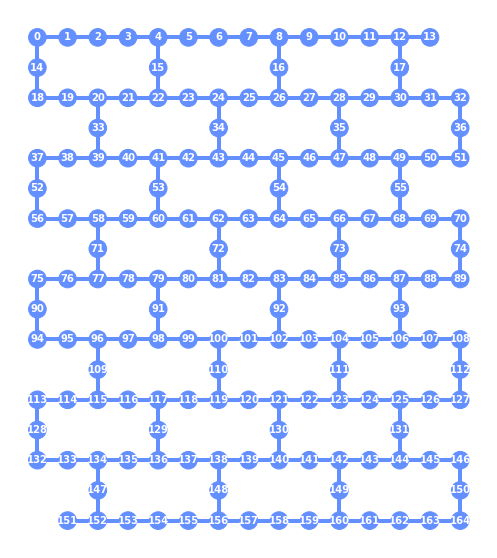

In [8]:
# for plotting: 
n_qubits_test = len(set(sum(conn_IBM_Wash_test, [])))
cmap_plot=get_coupling_map_single_heavy_hex(conn_IBM_Wash_test)
qubit_coordinates=get_qubit_coordinates_heavy_hex(n_rows, n_cols, 1)
plot_coupling_map(n_qubits_test, qubit_coordinates, cmap_plot, figsize=(10,10))

Connectivity: Analyze coupling density and nearest neigbours. <br>
Increase connectivity by randomly adding connections

In [9]:
print(get_coupling_density(conn_IBM_Wash_test))
print(get_num_NN(conn_IBM_Wash_test))

0.013895048041389505
2.278787878787879


In [10]:
conn_IBM_Wash_extended = increase_coupling_density(conn_IBM_Wash_test, 0.1)
print(get_coupling_density(conn_IBM_Wash_extended))
print(get_num_NN(conn_IBM_Wash_extended))

0.1
16.4


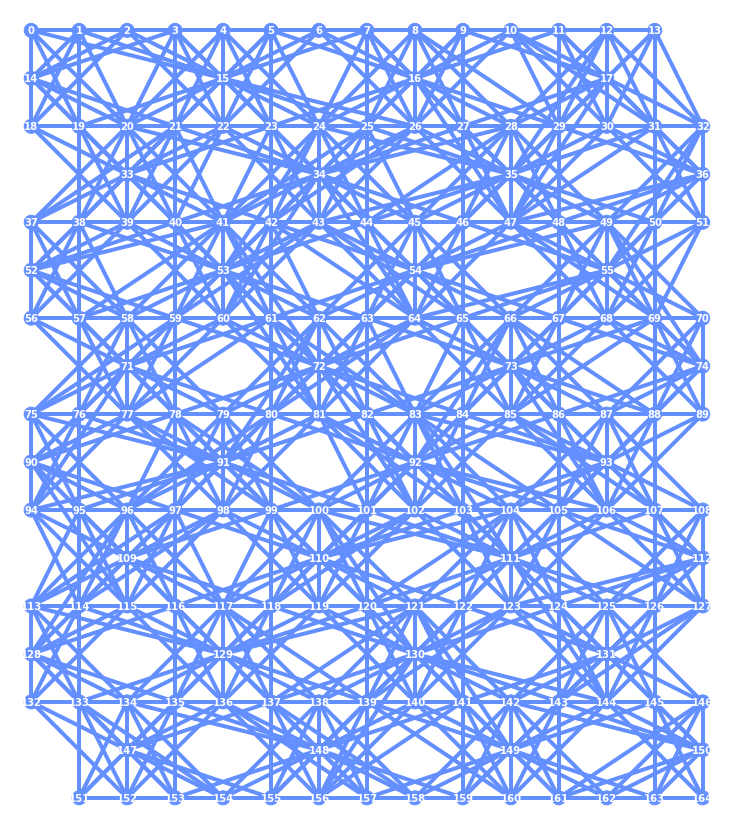

In [11]:
cmap_single = get_coupling_map_single_heavy_hex(conn_IBM_Wash_extended)
qubit_coordinates=get_qubit_coordinates_heavy_hex(n_rows, n_cols, 2)
plot_coupling_map(len(set(sum(conn_IBM_Wash_extended, []))), qubit_coordinates, cmap_single, figsize=(15,15))
